# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will perform. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1 to compute the hypothesis, the gradient of the cost function, and the cost function. This code will then be used by the next section of the workbook.

In [0]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

## hypothesis computes $h_theta$
def hypothesis(theta, X):
    # YOUR CODE HERE
    hypothesis = X @ theta
    
    return hypothesis

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
    # YOUR CODE HERE
    h_theta = hypothesis(theta, X)
    item = h_theta - y
    grad = torch.mm(X.t(), item) / X.size(0)
    
    return grad
    
## cost_func computes
def cost_func(theta, X, y):
    # YOUR CODE HERE
    h_theta = hypothesis(theta, X)
    item = h_theta - y
#     J = item**2 / (2 * X.size(0))
    diff = (0.5 * item**2).sum(0)
    J = diff / X.shape[0]
    
    return J

## Now we'd like to compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will run over weight updates. Complete the defined functions below and make sure to add the parameters which may need to be passed into the functions as well. Plot the weight updates over the contour plot using varying colours. Note, for clarity, you may only want to plot some of the updates.

In [0]:
# The weight updated computed using SGD
def weigthupdate_sgd(theta, X, y, alpha):
    # YOUR CODE HERE
    n = X.size(0)
    for idx in data:
      xi = X[idx:idx+1]
      yi = y[idx:idx+1]
      grad = grad_cost_func(theta, xi, yi)
      theta = theta - alpha * grad
      
    return theta


# The weight update computed using SGD + momentum
def weightupdate_sgd_momentum(theta, X, y, alpha, beta):
    # YOUR CODE HERE
    n = X.size(0)
    v = torch.zeros(theta_0.shape)
    for idx in data:
      xi = X[idx:idx+1]
      yi = y[idx:idx+1]
      grad = grad_cost_func(theta, xi, yi)
      v = beta * v + (1 - beta) * grad
      theta = theta - alpha * v
      
    return theta
  
  
# The weight update computed using the ADAM optimisation algorithm
def weightupdate_adam(count, theta, X, y, alpha, beta_1, beta_2):
    # YOUR CODE HERE
    n = X.size(0)
    v = torch.zeros(theta_0.shape)
    s = torch.zeros(theta_0.shape)
    eta = 1e-8
    for idx in data:
      xi = X[idx:idx+1]
      yi = y[idx:idx+1]
      grad = grad_cost_func(theta, xi, yi)
      v = beta_1 * v + (1 - beta_1) * grad
      v_hat = torch.div(v, 1 - beta_1**count)
      s = beta_2 * s + (1 - beta_2) * grad.pow(2)
      s_hat = torch.div(s, 1 - beta_2**count)
      delta_theta = - torch.div(alpha * v_hat, torch.sqrt(s_hat) + eta)
      theta = theta + delta_theta
      
    return theta

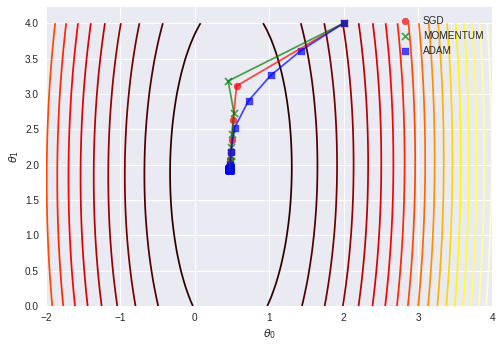

In [0]:
N = 200
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.01

theta_0 = torch.Tensor([[2],[4]]) #initialise

# Write the code that will call of the optimisation update functions and compute weight updates for each individual data point over N iterations.

# YOUR CODE HERE
# Shuffle the index 
data = []
for i in range(M):
   data.append(i)
random.shuffle(data)

# SGD
theta0_sgd = []
theta1_sgd = []
theta0_sgd.append(theta_0[0][0].numpy())
theta1_sgd.append(theta_0[1][0].numpy())
theta_sgd = theta_0
for i in range(0, N):
  theta_sgd = weigthupdate_sgd(theta_sgd, X, y, alpha)
  theta0_sgd.append(theta_sgd[0].numpy())
  theta1_sgd.append(theta_sgd[1].numpy())
  
plt.plot(theta0_sgd,theta1_sgd, color='r', alpha=0.7)
plt.scatter(theta0_sgd,theta1_sgd, marker='o', color='r', label='SGD', alpha=0.7)

# SGD + Momentum
theta0_sgd_mo = []
theta1_sgd_mo = []
theta0_sgd_mo.append(theta_0[0][0].numpy())
theta1_sgd_mo.append(theta_0[1][0].numpy())
theta_sgd_mo = theta_0
v = torch.zeros(theta_0.shape)
for i in range(0, N):
  theta_sgd_mo = weightupdate_sgd_momentum(theta_sgd_mo, X, y, alpha, beta_1)
  theta0_sgd_mo.append(theta_sgd_mo[0].numpy())
  theta1_sgd_mo.append(theta_sgd_mo[1].numpy())

plt.plot(theta0_sgd_mo,theta1_sgd_mo, color='g', alpha=0.7)
plt.scatter(theta0_sgd_mo,theta1_sgd_mo, marker='x', color='g', label='MOMENTUM', alpha=0.7)

# Adam
theta0_adam = []
theta1_adam = []
theta0_adam.append(theta_0[0][0].numpy())
theta1_adam.append(theta_0[1][0].numpy())
theta_adam = theta_0
for i in range(1, N+1):
  theta_adam = weightupdate_adam(i, theta_adam, X, y, alpha, beta_1, beta_2)
  theta0_adam.append(theta_adam[0].numpy())
  theta1_adam.append(theta_adam[1].numpy())

plt.plot(theta0_adam,theta1_adam, color='b', alpha=0.7)
plt.scatter(theta0_adam,theta1_adam, marker='s', color='b', label='ADAM', alpha=0.7)


theta_0_vals = np.linspace(-2.0,4.0,100)
theta_1_vals = np.linspace(0.0,4.0,100)
J = np.zeros((theta_0_vals.size, theta_1_vals.size))
  
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)

for (i, j), v in np.ndenumerate(J):
    theta_tmp = torch.Tensor([[xc[i, j]], [yc[i, j]]])
    J[i, j] = cost_func(theta_tmp, X, y)
    
contours = plt.contour(xc, yc, J, 20, cmap = plt.cm.hot)

# Now plot the output of SGD, momentum and Adam all on the same plot for comparison
# YOUR CODE HERE
plt.legend(loc='upper right', fancybox=True, shadow=True)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()